In [73]:
%matplotlib inline

import os
import pandas as pd
import math
import re
import seaborn as sns
import numpy as np
import glob
from functools import reduce

import csv

from matplotlib import pyplot as plt
import matplotlib.dates as md
from datetime import datetime,timedelta

In [74]:
import matplotlib

plt.rcParams['figure.figsize'] = 50, 10
font = {'size'   : 30}
matplotlib.rc('font', **font)

In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [100]:
df = pd.read_csv("compat.csv",names=["item", "activity", "compat"])
len(df)

736920

In [80]:
df.head(5)

,item,activity,compat
0,00043ad3146f033d4bf1beb502fa6e09,ACTIVITY_Retail,0.096945
1,00043ad3146f033d4bf1beb502fa6e09,GENDER_F,0.678251
2,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Colombia,0.146094
3,00043ad3146f033d4bf1beb502fa6e09,loan_buck_1,0.146094
4,00043ad3146f033d4bf1beb502fa6e09,pfr_buck_3,0.303840


In [81]:
protected_list_loan_buck = ['loan_buck_5']
pattern_loan_buck = '|'.join(protected_list_loan_buck)

protected_list_country = ['COUNTRY_low_pfr']
pattern_country = '|'.join(protected_list_country)

df_lb = df[df['activity'].str.contains('loan_buck_')]
df_c = df[df['activity'].str.contains('COUNTRY_')]

df_lb['protected_list_loan_buck'] = df_lb.activity.str.contains(pattern_loan_buck)
df_c['protected_list_country'] = df_c.activity.str.contains(pattern_country)

/tmp/ipykernel_465/2234542145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lb['protected_list_loan_buck'] = df_lb.activity.str.contains(pattern_loan_buck)
/tmp/ipykernel_465/2234542145.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['protected_list_country'] = df_c.activity.str.contains(pattern_country)


In [82]:
df_c.head(5)

,item,activity,compat,protected_list_country
2,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Colombia,0.146094,False
6,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Philippines,0.069530,False
9,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Jordan,0.069530,False
12,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Bolivia,0.038944,False
14,00043ad3146f033d4bf1beb502fa6e09,COUNTRY_Ghana,0.038944,False


In [87]:
print("Protected list: loan_buck: FALSE")
print(np.nanmean(df_lb[df_lb["protected_list_loan_buck"] == False].compat))
print(np.nanstd(df_lb[df_lb["protected_list_loan_buck"] == False].compat))
print("\n")
print("Protected list: loan_buck: TRUE")
print(np.nanmean(df_lb[df_lb["protected_list_loan_buck"] == True].compat))
print(np.nanstd(df_lb[df_lb["protected_list_loan_buck"] == True].compat))

print("\n\n")

print("Protected list: country: FALSE")
print(np.nanmean(df_c[df_c["protected_list_country"] == False].compat))
print(np.nanstd(df_c[df_c["protected_list_country"] == False].compat))
print("\n")
print("Protected list: country: TRUE")
print(np.nanmean(df_c[df_c["protected_list_country"] == True].compat))
print(np.nanstd(df_c[df_c["protected_list_country"] == True].compat))

Protected list: loan_buck: FALSE
0.1241685953160367
0.1136161178868693


Protected list: loan_buck: TRUE
0.13157803300965282
0.099076093386413



Protected list: country: FALSE
0.028473193821314646
0.06847679419468829


Protected list: country: TRUE
0.0914782678236598
0.10455523560131103


In [133]:
# LOAN_BUCK:
print((0.12-0.13)/0.13*100)
# 8 percent
print(0.09/0.13*8)

# COUNTRY:
print((0.03-0.09)/0.09*100)
# 66 percent
print(0.10/0.09*66)

# deviation: amount of discount

-7.692307692307699
5.538461538461538
-66.66666666666666
73.33333333333334


## Distribution - loan bucket

<Axes: ylabel='Frequency'>

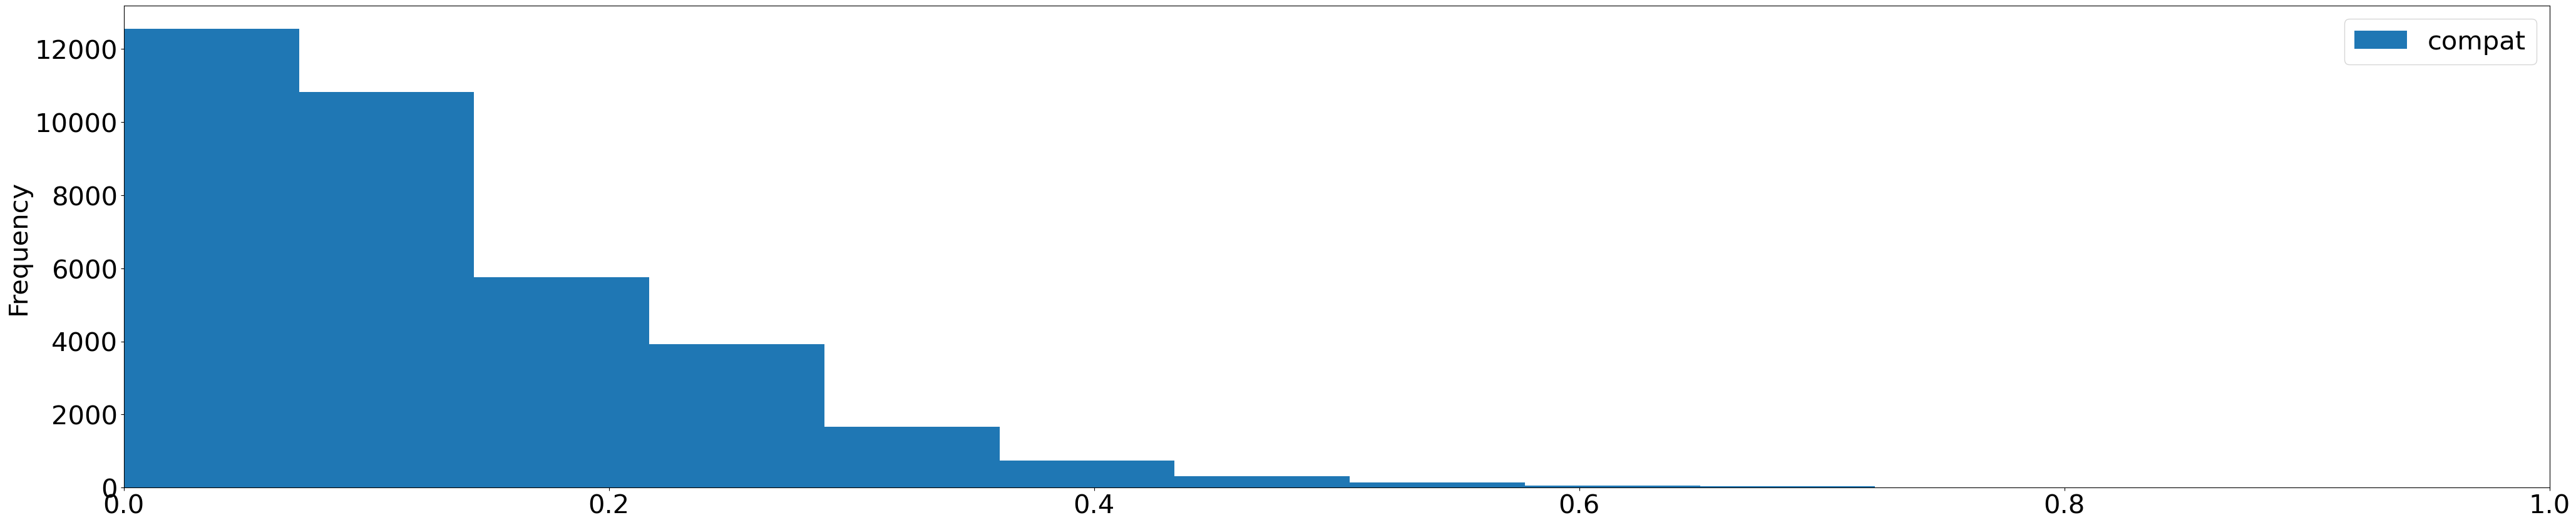

In [118]:
df_lb[df_lb["protected_list_loan_buck"] == False].plot.hist(column=["compat"], xlim=(0,1))

<Axes: ylabel='Frequency'>

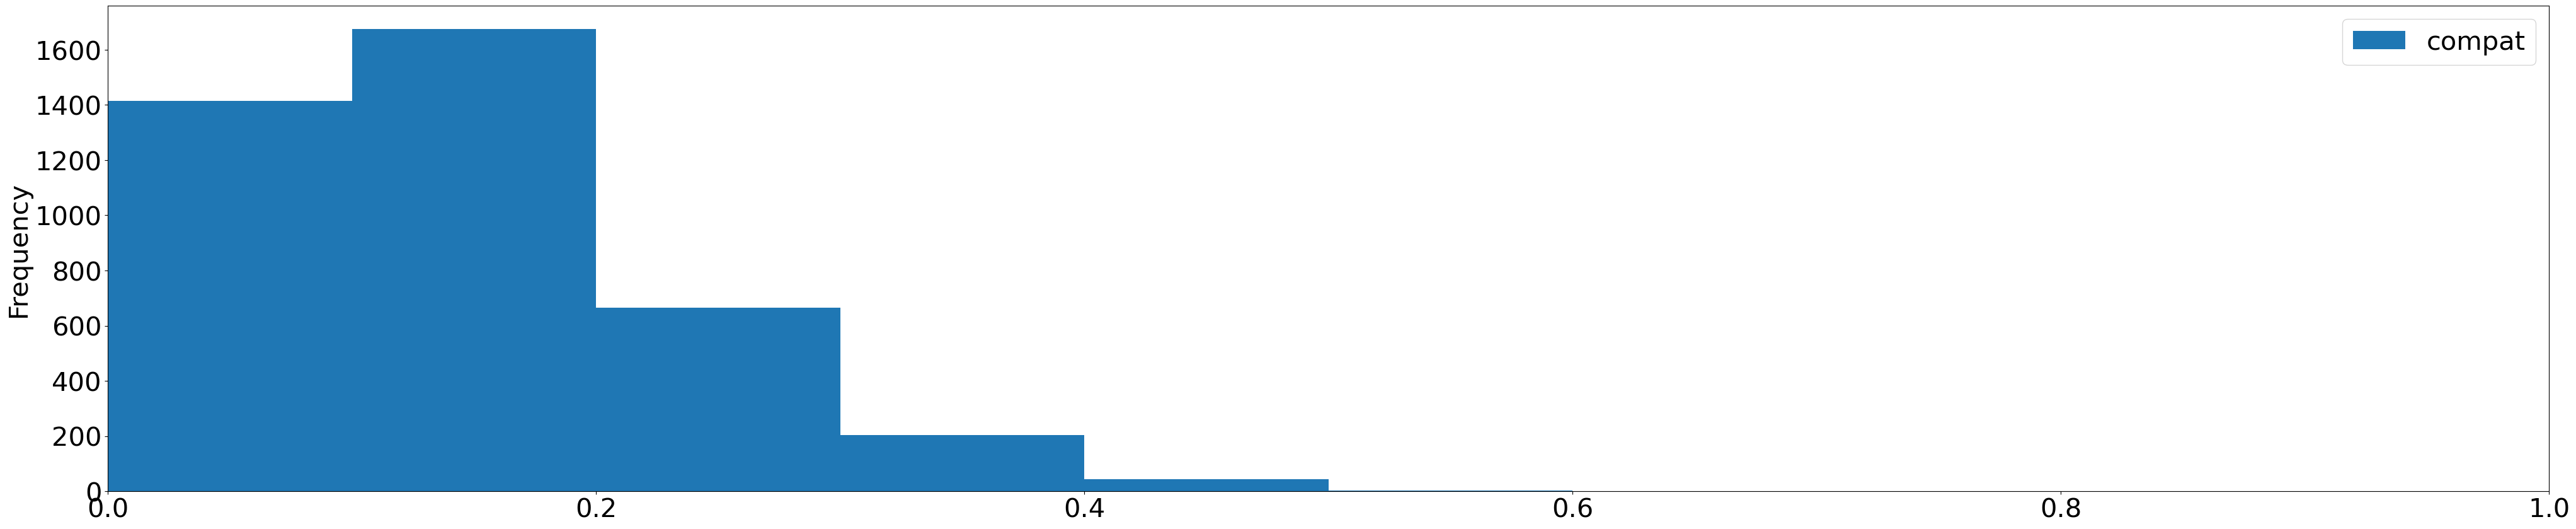

In [120]:
df_lb[df_lb["protected_list_loan_buck"] == True].plot.hist(column=["compat"], xlim=(0,1))

## Distribution - country

<Axes: ylabel='Frequency'>

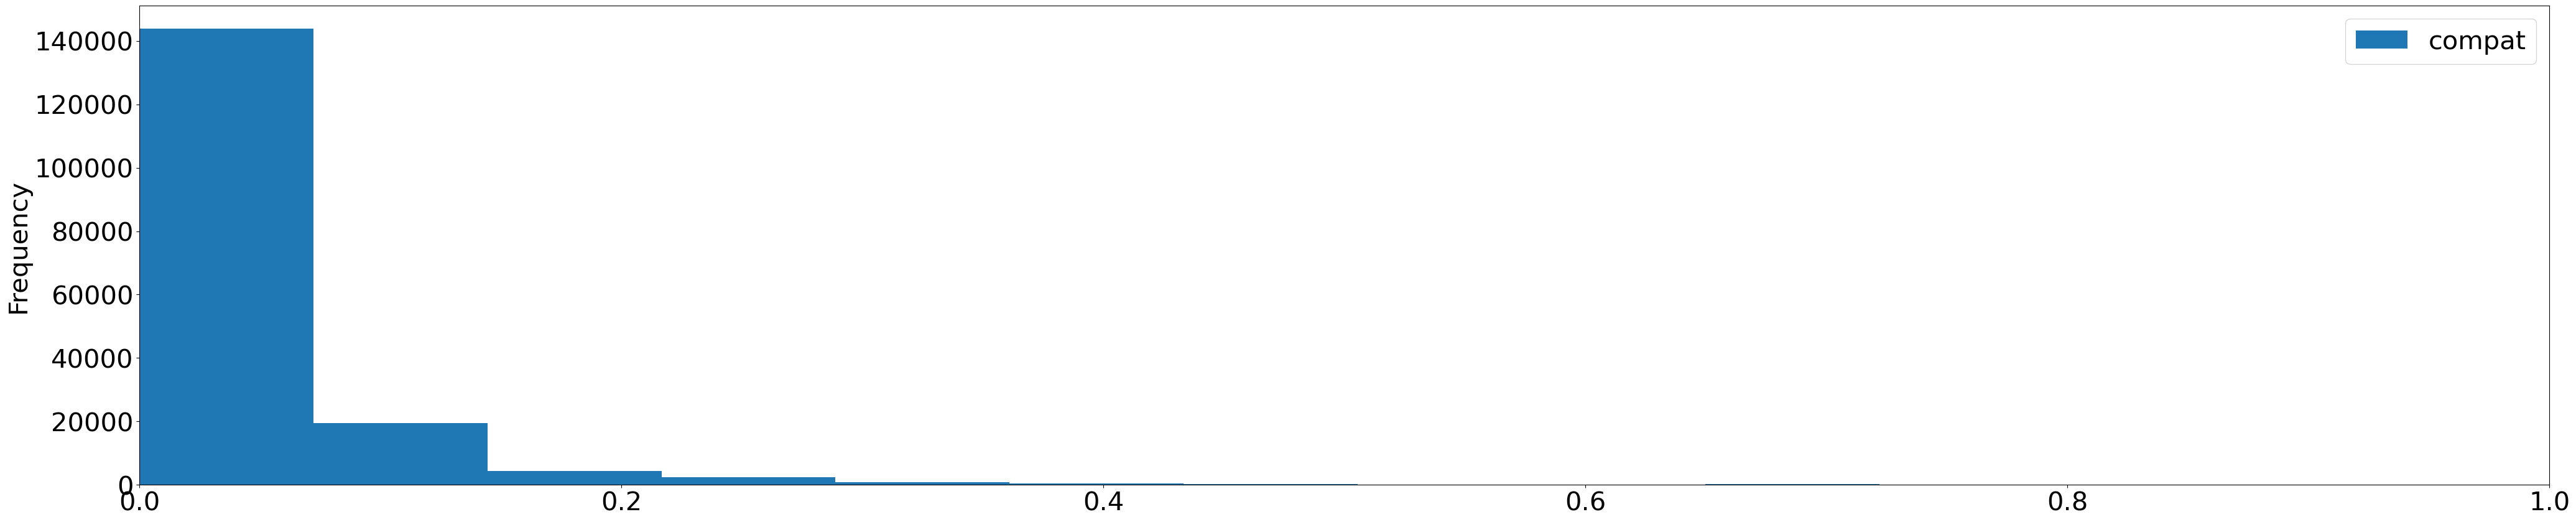

In [122]:
df_c[df_c["protected_list_country"] == False].plot.hist(column=["compat"], xlim=(0,1))

<Axes: ylabel='Frequency'>

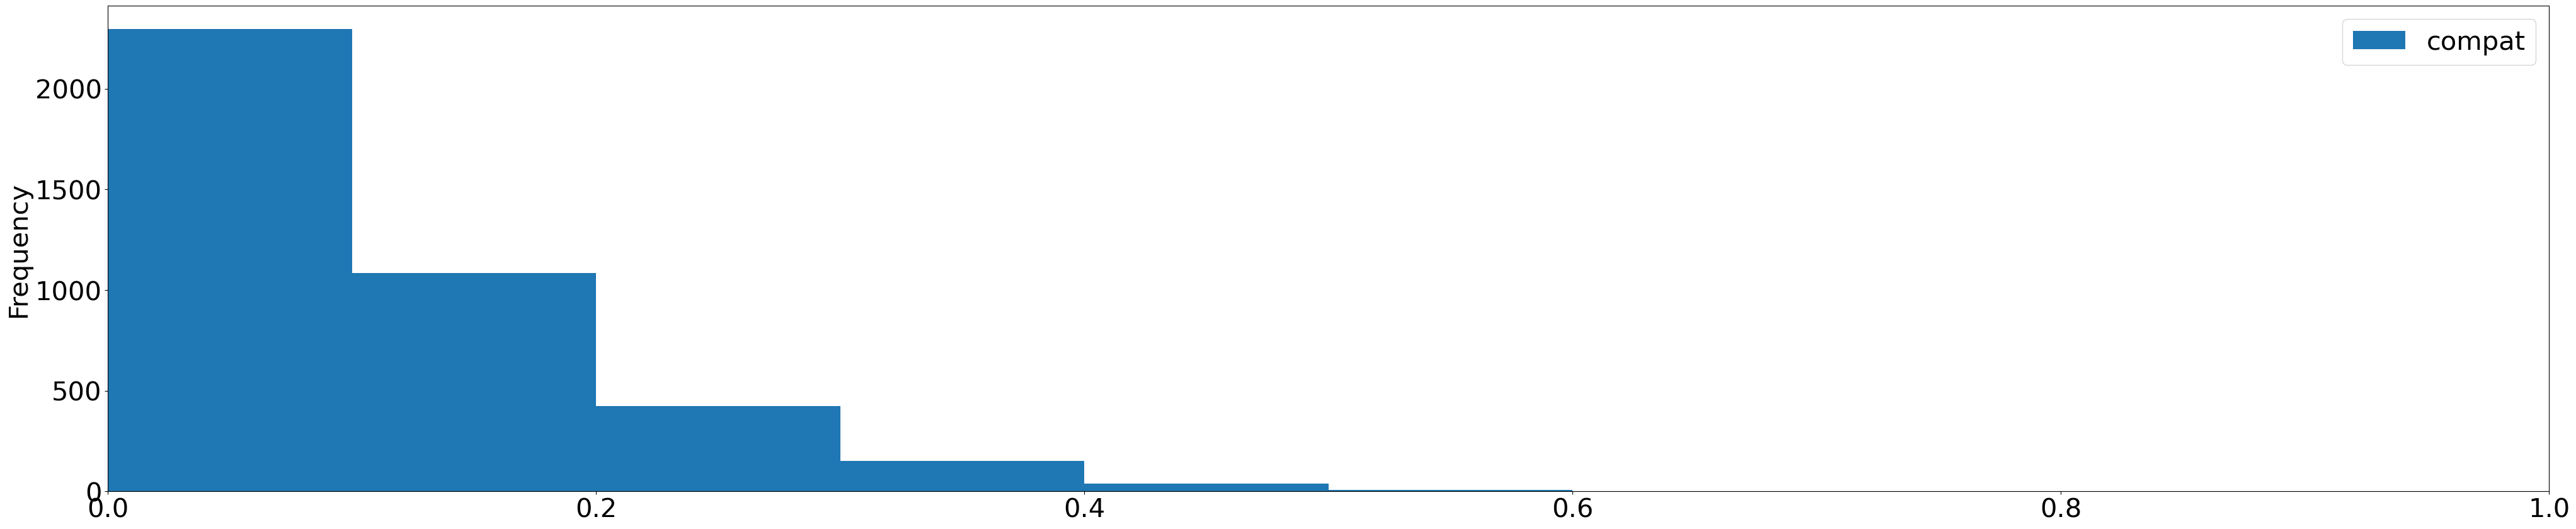

In [124]:
df_c[df_c["protected_list_country"] == True].plot.hist(column=["compat"], xlim=(0,1))